In [161]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import os
import glob
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows', 300)  # Show all rows

os.chdir('/content/drive/MyDrive/Real_Trader_EDA_R1/Target_Optimization_data/')
# Path to your data folder in Google Drive
data_folder = '/content/drive/MyDrive/Real_Trader_EDA_R1/Data/Target_Optimization_data'

# List files in the specified folder to confirm access
folder_path = os.path.join(data_folder, '/content/drive/MyDrive/Real_Trader_EDA_R1/Target_Optimization_data')  # Update 'path_to_your_data_folder' with your actual folder path
file_list = os.listdir(folder_path)
file_list

['Copy of ideal_target.csv',
 'Copy of New_5min_data (2).csv',
 'Copy of ES 09-24_Minute_5.csv',
 'df_target_comparision.csv',
 '.ipynb_checkpoints',
 'ideal_data_profit_loss_data.csv',
 'cal_data_profit_loss_data.csv',
 'trade_data_profit_loss_data.csv',
 'trade_data_processed.csv',
 'trade_defence_target.csv',
 'cal_defence_target.csv',
 'ideal_defence_target.csv',
 'Final_Data.csv']

In [164]:
trade_data = pd.read_csv("/content/drive/MyDrive/Real_Trader_EDA_R1/Target_Optimization_data/trade_data_profit_loss_data.csv")  #trade data
cal_data = pd.read_csv("/content/drive/MyDrive/Real_Trader_EDA_R1/Target_Optimization_data/cal_data_profit_loss_data.csv")  #cal data
ideal_data = pd.read_csv("/content/drive/MyDrive/Real_Trader_EDA_R1/Target_Optimization_data/ideal_data_profit_loss_data.csv")  #ideal

In [165]:

# Function to process a single CSV file
def process_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Check for unnamed columns and remove them if present
    unnamed_cols = df.columns.str.contains('^Unnamed')
    if unnamed_cols.any():
        df = df.loc[:, ~unnamed_cols]

    # Convert 'Time Stamp' column to datetime if it exists
    if 'Time Stamp' in df.columns:
        df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

    return df

# Paths to your CSV files
csv_files = ['trade_data_profit_loss_data.csv', 'cal_data_profit_loss_data.csv', 'ideal_data_profit_loss_data.csv']

# Process each CSV file
processed_dataframes = [process_csv(file) for file in csv_files]
trade_data = processed_dataframes[0]
cal_data = processed_dataframes[1]
ideal_data = processed_dataframes[2]


In [166]:
def drop_columns(dataframes, columns):

    for df in dataframes:
        df.drop(columns=columns, inplace=True)
    return dataframes

# Example usage
columns_to_drop = ["Highest_value", "Highest_timestamp", "Stop_Match_timestamp"]
trade_data, cal_data, ideal_data = drop_columns([trade_data, cal_data, ideal_data], columns_to_drop)


In [168]:
def format_datetime(x):
    if x == '0':
        return x
    else:
        return pd.to_datetime(x, format='%m/%d/%Y %H:%M')

trade_data['BuyersInControlTime'] = trade_data['BuyersInControlTime'].apply(format_datetime)
trade_data['SellersInControlTime'] = trade_data['SellersInControlTime'].apply(format_datetime)
cal_data['BuyersInControlTime'] = cal_data['BuyersInControlTime'].apply(format_datetime)
cal_data['SellersInControlTime'] = cal_data['SellersInControlTime'].apply(format_datetime)
ideal_data['BuyersInControlTime'] = ideal_data['BuyersInControlTime'].apply(format_datetime)
ideal_data['SellersInControlTime'] = ideal_data['SellersInControlTime'].apply(format_datetime)

In [169]:
print(trade_data.columns)
print(cal_data.columns)
print(ideal_data.columns)

Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',
       'BuyersLevel0', 'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
       'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
       'SellersInControlTime', 'SellersInControlPrice', 'Entry', 'Defence',
       'Stop', 'Target', 'Profit', 'Loss'],
      dtype='object')
Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',
       'BuyersLevel0', 'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
       'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
       'SellersInControlTime', 'SellersInControlPrice', 'Entry', 'Defence',
       'Stop', 'Target', 'Profit', 'Loss'],
      dtype='object')
Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',

In [170]:
import pandas as pd

def prepare_final_data(cal_data, ideal_data, trade_data):
    # List of columns to drop
    columns_to_drop = [
        'Time Stamp', 'Open', 'High', 'Low', 'Close',
        'SellersLevel4', 'SellersLevel3', 'SellersLevel2',
        'SellersLevel1', 'SellersLevel0', 'BuyersLevel0',
        'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
        'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
        'SellersInControlTime', 'SellersInControlPrice', 'Profit', 'Loss'
    ]

    # Drop unnecessary columns from cal_data
    cal_data.drop(columns=[col for col in columns_to_drop if col in cal_data.columns], inplace=True)

    # Drop unnecessary columns from ideal_data
    ideal_columns_to_drop = columns_to_drop + ['Entry', 'Defence', 'Stop']
    ideal_data.drop(columns=[col for col in ideal_columns_to_drop if col in ideal_data.columns], inplace=True)

    # Rename columns in trade_data if they exist
    columns_to_rename = {
        'Entry': 'Entry_T',
        'Defence': 'Defence_T',
        'Stop': 'Stop_T'
    }
    trade_data.rename(columns={k: v for k, v in columns_to_rename.items() if k in trade_data.columns}, inplace=True)

    # Rename Target column in ideal_data if it exists
    if 'Target' in ideal_data.columns:
        ideal_data.rename(columns={'Target': 'Ideal_Target'}, inplace=True)

    # Rename columns in cal_data
    cal_data.rename(columns=lambda x: x + '_C' if x != 'Cal_Target' else 'Cal_Target', inplace=True)

    # Concatenate cal_data and ideal_data to the left of trade_data
    final_data = pd.concat([cal_data, ideal_data], axis=1)
    final_data = pd.concat([trade_data, final_data], axis=1)

    return final_data

# Example usage:
# final_data = prepare_final_data(cal_data, ideal_data, trade_data)


In [ ]:
# final_data = prepare_final_data(cal_data, ideal_data, trade_data)

In [171]:
Final_Data = pd.read_csv("/content/drive/MyDrive/Real_Trader_EDA_R1/Target_Optimization_data/Final_Data.csv")

In [172]:
Final_Data.columns

Index(['Time Stamp', 'Open', 'High', 'Low', 'Close', 'SellersLevel4',
       'SellersLevel3', 'SellersLevel2', 'SellersLevel1', 'SellersLevel0',
       'BuyersLevel0', 'BuyersLevel1', 'BuyersLevel2', 'BuyersLevel3',
       'BuyersLevel4', 'BuyersInControlTime', 'BuyersInControlPrice',
       'SellersInControlTime', 'SellersInControlPrice', 'Entry_T', 'Entry_C',
       'Defence_T', 'Defence_C', 'Stop_T', 'Stop_C', 'Target', 'Target_C',
       'Ideal_Target'],
      dtype='object')

In [173]:
def calculate_correlation_matrix(data):
    # Select only the numerical columns
    numerical_cols = data.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = data[numerical_cols].corr()

    return corr_matrix

# Example usage:
corr_matrix_t = calculate_correlation_matrix(Final_Data)

In [174]:
corr_matrix_t

,Open,High,Low,Close,SellersLevel4,SellersLevel3,SellersLevel2,SellersLevel1,SellersLevel0,BuyersLevel0,BuyersLevel1,BuyersLevel2,BuyersLevel3,BuyersLevel4,BuyersInControlPrice,SellersInControlPrice,Entry_T,Entry_C,Defence_T,Defence_C,Stop_T,Stop_C,Target,Target_C,Ideal_Target
Open,1.000000,0.998697,0.999706,0.998650,-0.073530,-0.056501,-0.032155,-0.008511,0.015324,0.240482,0.251019,0.279779,0.290854,0.301540,0.070392,-0.089645,-0.013146,-0.013376,-0.013174,-0.013417,-0.013192,-0.013458,-0.013115,-0.013295,-0.014914
High,0.998697,1.000000,0.998635,0.999684,-0.073052,-0.056561,-0.032435,-0.009778,0.012624,0.239005,0.250063,0.278108,0.289604,0.300835,0.092534,-0.081239,0.012431,0.012182,0.012399,0.012138,0.012378,0.012094,0.012464,0.012270,0.010784
Low,0.999706,0.998635,1.000000,0.998974,-0.072850,-0.055698,-0.031257,-0.007368,0.016621,0.240848,0.252210,0.280828,0.291910,0.302481,0.074392,-0.085233,-0.006177,-0.006407,-0.006205,-0.006447,-0.006223,-0.006488,-0.006146,-0.006325,-0.007951
Close,0.998650,0.999684,0.998974,1.000000,-0.072114,-0.055450,-0.031235,-0.008207,0.014489,0.238966,0.250750,0.278833,0.290297,0.301508,0.094109,-0.076864,0.017317,0.017073,0.017285,0.017029,0.017265,0.016986,0.017349,0.017159,0.015644
SellersLevel4,-0.073530,-0.073052,-0.072850,-0.072114,1.000000,0.898930,0.790460,0.691884,0.559054,-0.017724,-0.018794,-0.020813,-0.021910,-0.023551,0.001837,0.092817,0.076905,0.077032,0.076951,0.077056,0.076966,0.077080,0.076888,0.076984,0.076266
SellersLevel3,-0.056501,-0.056561,-0.055698,-0.055450,0.898930,1.000000,0.879570,0.770208,0.622950,-0.013592,-0.014562,-0.016191,-0.017113,-0.018521,-0.002177,0.080578,0.063552,0.063686,0.063597,0.063707,0.063612,0.063729,0.063536,0.063642,0.062853
SellersLevel2,-0.032155,-0.032435,-0.031257,-0.031235,0.790460,0.879570,1.000000,0.876017,0.709299,-0.008267,-0.009241,-0.010525,-0.011270,-0.012437,0.006011,0.074485,0.065536,0.065655,0.065578,0.065673,0.065590,0.065691,0.065524,0.065618,0.064727
SellersLevel1,-0.008511,-0.009778,-0.007368,-0.008207,0.691884,0.770208,0.876017,1.000000,0.810309,-0.002982,-0.003910,-0.004826,-0.005389,-0.006343,-0.000230,0.068985,0.055784,0.055905,0.055828,0.055923,0.055841,0.055941,0.055772,0.055868,0.054847
SellersLevel0,0.015324,0.012624,0.016621,0.014489,0.559054,0.622950,0.709299,0.810309,1.000000,0.003510,0.002977,0.002939,0.002772,0.002263,-0.010642,0.053724,0.034551,0.034690,0.034601,0.034707,0.034615,0.034724,0.034541,0.034656,0.033388
BuyersLevel0,0.240482,0.239005,0.240848,0.238966,-0.017724,-0.013592,-0.008267,-0.002982,0.003510,1.000000,0.797293,0.635027,0.588452,0.539924,0.015206,0.013299,0.023766,0.023673,0.023750,0.023673,0.023748,0.023673,0.023760,0.023674,0.022981


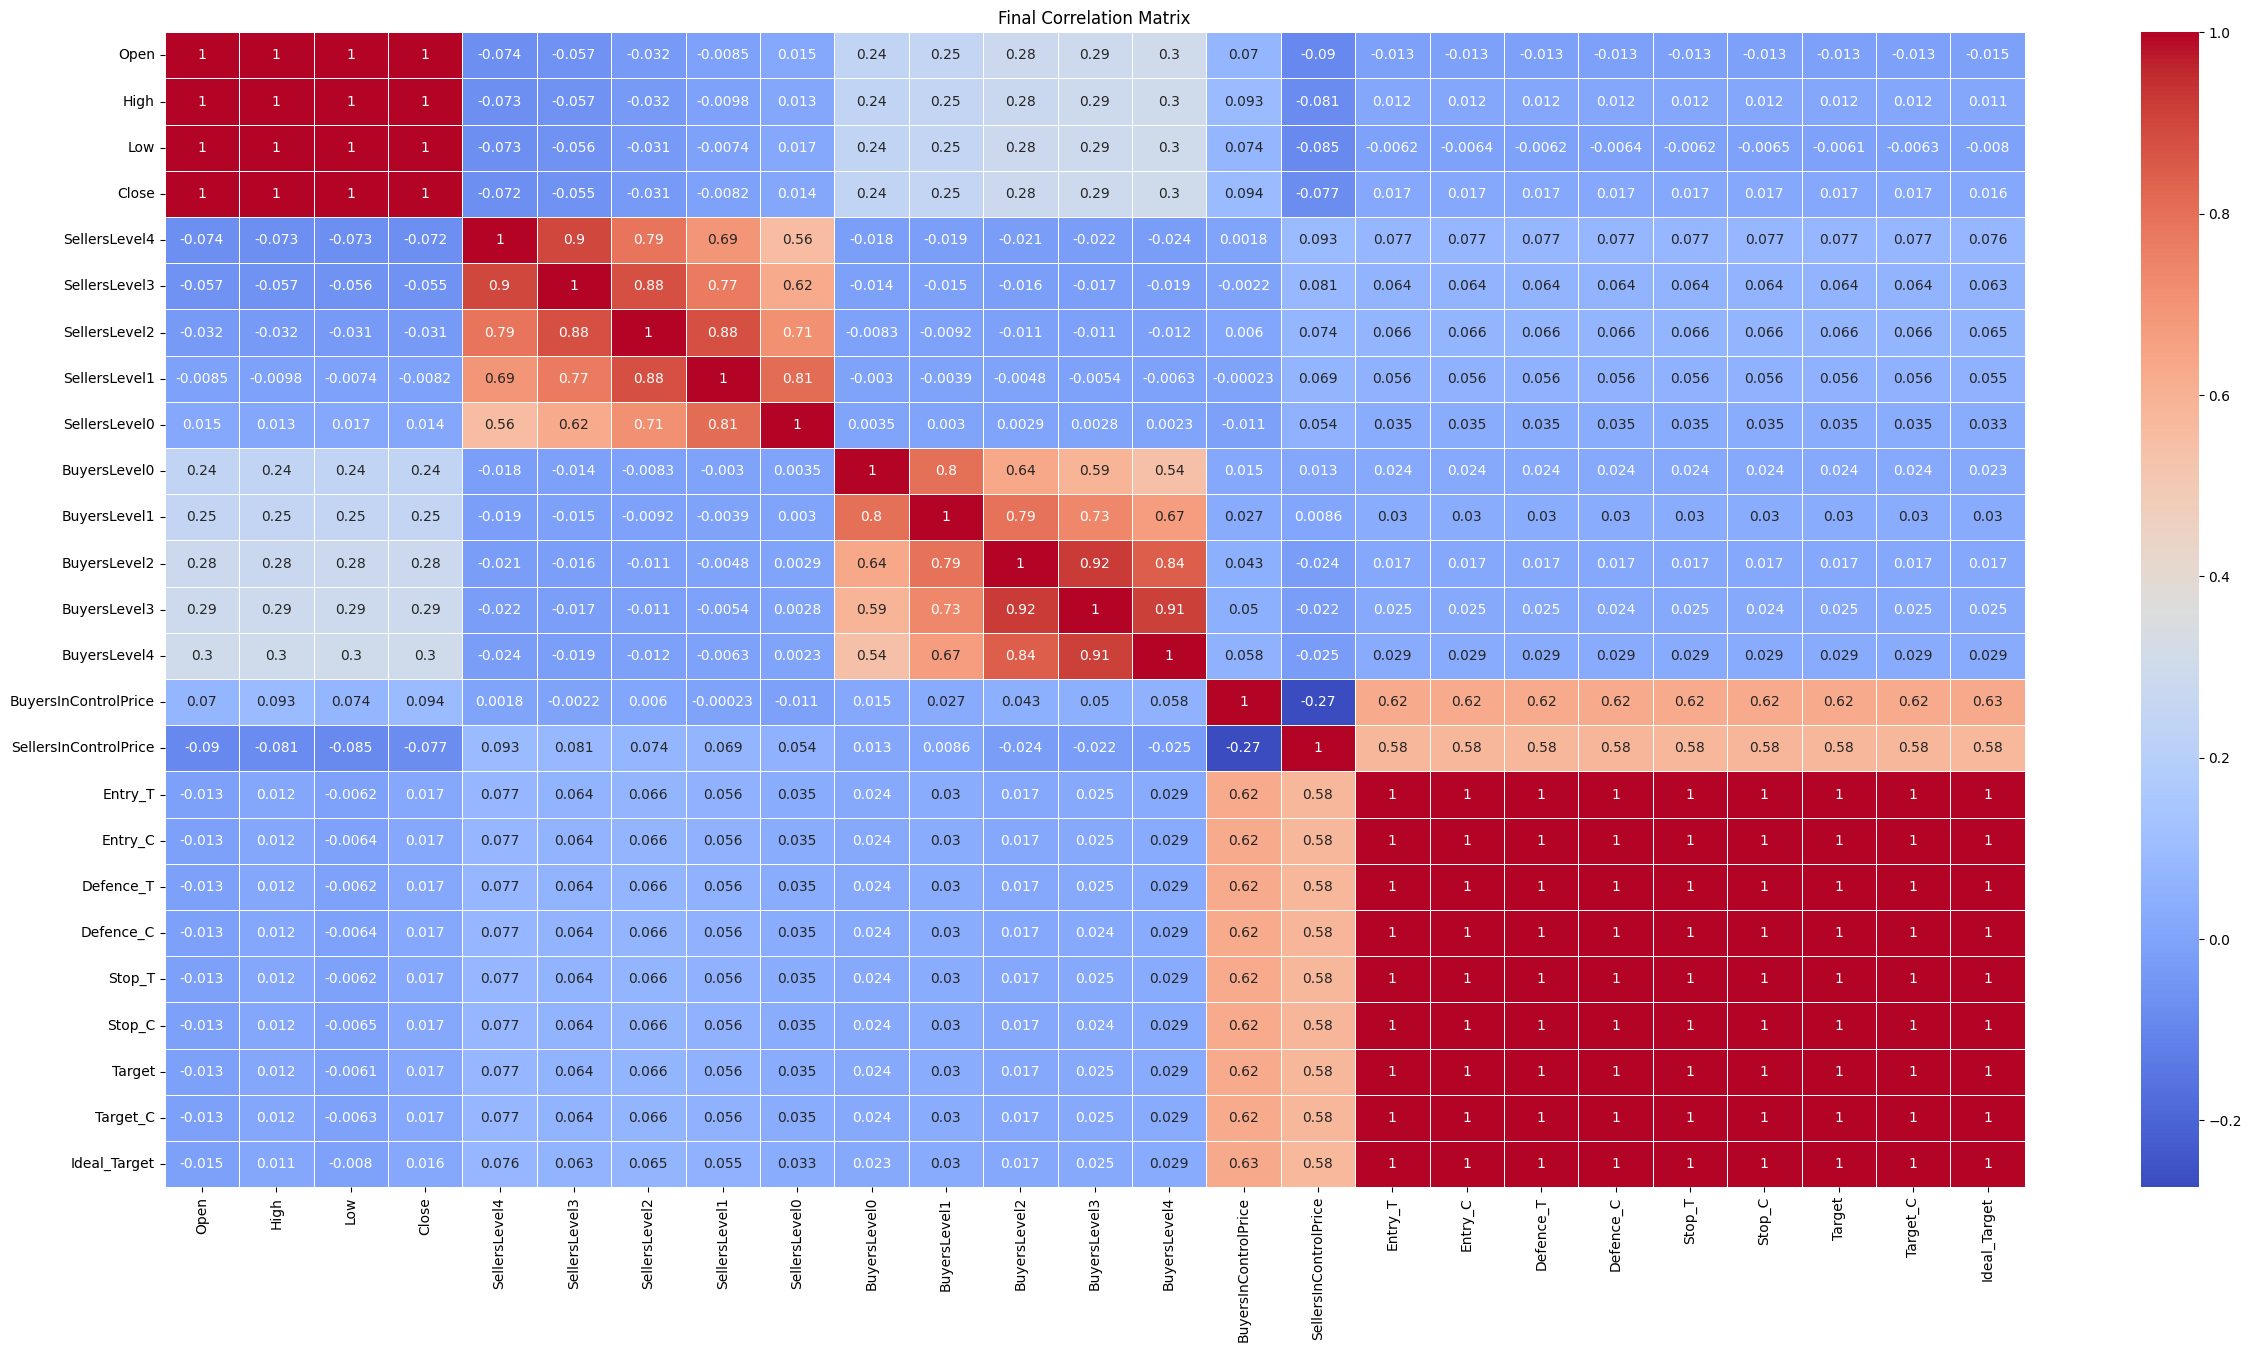

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_correlation_matrix(df, title="Correlation Matrix"):
    # Select only the numerical columns
    numerical_cols = df.select_dtypes(include=['float64']).columns

    # Create the correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(30, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Example usage:
create_correlation_matrix(Final_Data, "Final Correlation Matrix")

In [176]:
import pandas as pd

def calculate_correlation_matrix(data):
    # Select only the numerical columns
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

    # Create the correlation matrix
    corr_matrix = data[numerical_cols].corr()

    return corr_matrix

def get_top_correlated_features(corr_matrix, target_column, top_n=15):
    # Extract the correlation values for the target column
    target_corr = corr_matrix[target_column].drop(target_column)

    # Sort the correlations by absolute value in descending order
    top_correlated_features = target_corr.abs().sort_values(ascending=False).head(top_n)

    return top_correlated_features

# Example usage:
corr_matrix_t = calculate_correlation_matrix(Final_Data)

# Assuming 'ideal_target' is the column of interest
top_correlated_features = get_top_correlated_features(corr_matrix_t, 'Ideal_Target')

print("Top 5 features most correlated with 'ideal_target':")
print(top_correlated_features)


Top 5 features most correlated with 'ideal_target':
Target                   0.999927
Entry_T                  0.999925
Target_C                 0.999922
Defence_T                0.999921
Stop_T                   0.999920
Entry_C                  0.999916
Defence_C                0.999912
Stop_C                   0.999909
BuyersInControlPrice     0.629075
SellersInControlPrice    0.575469
SellersLevel4            0.076266
SellersLevel2            0.064727
SellersLevel3            0.062853
SellersLevel1            0.054847
SellersLevel0            0.033388
Name: Ideal_Target, dtype: float64


In [177]:
# Assuming 'ideal_target' is the column of interest
top_correlated_features = get_top_correlated_features(corr_matrix_t, 'Target')

print("Top 5 features most correlated with 'Target':")
print(top_correlated_features)


Top 5 features most correlated with 'Target':
Entry_T                  1.000000
Defence_T                1.000000
Stop_T                   0.999999
Target_C                 0.999999
Entry_C                  0.999998
Defence_C                0.999997
Stop_C                   0.999997
Ideal_Target             0.999927
BuyersInControlPrice     0.624094
SellersInControlPrice    0.580750
SellersLevel4            0.076888
SellersLevel2            0.065524
SellersLevel3            0.063536
SellersLevel1            0.055772
SellersLevel0            0.034541
Name: Target, dtype: float64


In [ ]:
# Assuming 'ideal_target' is the column of interest
top_correlated_features = get_top_correlated_features(corr_matrix_t, 'Target_C')

print("Top 5 features most correlated with 'Target_C':")
print(top_correlated_features)


Top 5 features most correlated with 'Target_C':
Entry_C                  1.000000
Defence_C                0.999999
Defence_T                0.999999
Stop_T                   0.999999
Entry_T                  0.999999
Stop_C                   0.999999
Target                   0.999999
Ideal_Target             0.999922
BuyersInControlPrice     0.623703
SellersInControlPrice    0.581158
SellersLevel4            0.076984
SellersLevel2            0.065618
SellersLevel3            0.063642
SellersLevel1            0.055868
SellersLevel0            0.034656
Name: Target_C, dtype: float64
